In [73]:
import pandas as pd
import numpy as np
import nltk

In [74]:
df = pd.read_csv('cleaned_short_simple.csv')

In [75]:
data = pd.read_csv('cleaned_short.csv')

In [76]:
df.shape

(235087, 2)

In [77]:
df['target'] = data['target']
df['obscene'] = data['obscene']

In [78]:
df['threat'] = data['threat']
df['insult'] = data['insult']

In [79]:
df = df.dropna()
text = df.comment_text

In [80]:
df.head(4)

,y,comment_text,target,obscene,threat,insult
0,0,great story man wonder person yelled shut fuck...,0.4400,0.293333,0.0000,0.3200
1,1,yet call muslims acts get pilloried okay smear...,0.9125,0.237500,0.1125,0.8875
2,0,people drive cars ones cause wear tear roads p...,0.0000,0.000000,0.0000,0.0000
3,0,mormons complicated relationship federal law,0.3000,0.000000,0.0000,0.0000


In [81]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [105]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=62
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Most used Words

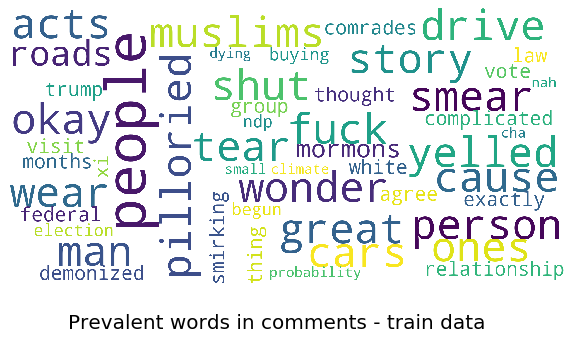

In [106]:
show_wordcloud(df['comment_text'], title = 'Prevalent words in comments - train data')

## Common Insult Words

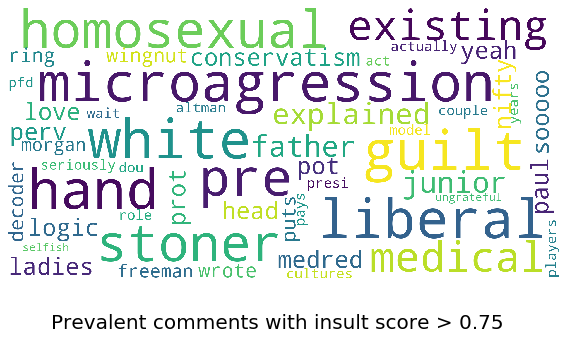

In [107]:
show_wordcloud(df.loc[df['insult'] > 0.9]['comment_text'], 
               title = 'Prevalent comments with insult score > 0.75')

## Common Threat Words

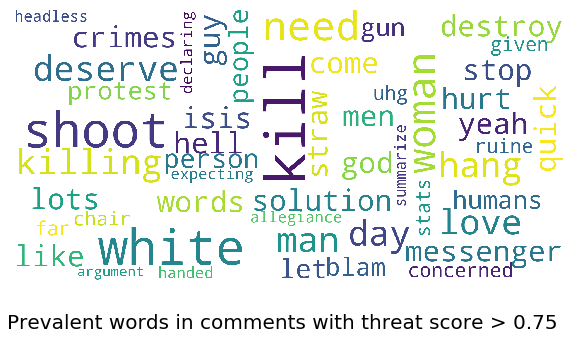

In [108]:
show_wordcloud(df.loc[df['threat'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with threat score > 0.75')

## Common Obscene Words

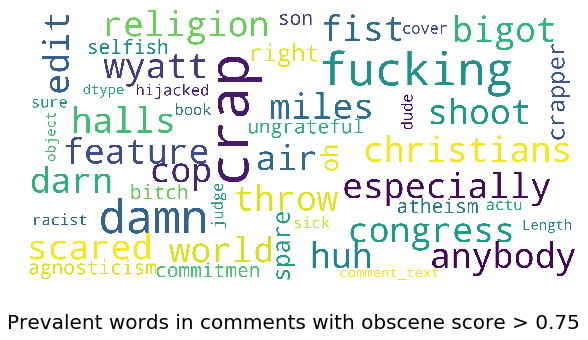

In [109]:
show_wordcloud(df.loc[df['obscene'] > 0.75]['comment_text'], 
               title = 'Prevalent words in comments with obscene score > 0.75')

## Common Toxic Words

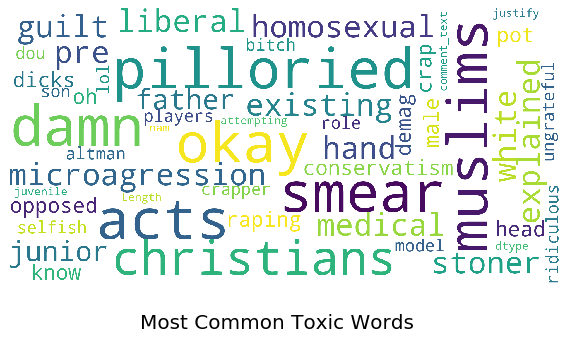

In [110]:
show_wordcloud(df.loc[df['target'] > 0.9]['comment_text'], 
               title = 'Most Common Toxic Words')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a58fd7f10>]],
      dtype=object)

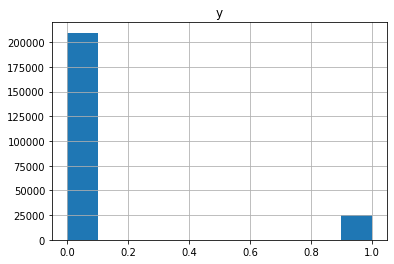

In [128]:

df[['y']].hist()

In [141]:
round(df.y.value_counts(normalize=True),3)

0    0.893
1    0.107
Name: y, dtype: float64